# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import json
import time
import urllib

from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 621


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city) 
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mar del plata
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=mar%20del%20plata
Processing Record 2 of Set 1 | castro
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=castro
Processing Record 3 of Set 1 | punta arenas
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=punta%20arenas
Processing Record 4 of Set 1 | broken hill
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=broken%20hill
Processing Record 5 of Set 1 | belushya guba
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=belushya%20guba
City not found. Skipping...
Processing Record 6 of Set 1 | flinders
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44

Processing Record 2 of Set 2 | akdepe
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=akdepe
Processing Record 3 of Set 2 | mont-dore
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=mont-dore
Processing Record 4 of Set 2 | tiksi
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=tiksi
Processing Record 5 of Set 2 | verkhniy baskunchak
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=verkhniy%20baskunchak
Processing Record 6 of Set 2 | juneau
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=juneau
Processing Record 7 of Set 2 | mayya
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=mayya
Processing Record 8 of Set 2 | illoqqortoormiut
http://api.openweathermap.org/data

Processing Record 5 of Set 3 | bubaque
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=bubaque
Processing Record 6 of Set 3 | gazojak
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=gazojak
Processing Record 7 of Set 3 | bronnoysund
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=bronnoysund
Processing Record 8 of Set 3 | makakilo city
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=makakilo%20city
Processing Record 9 of Set 3 | marzuq
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=marzuq
Processing Record 10 of Set 3 | yerbogachen
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=yerbogachen
Processing Record 11 of Set 3 | khormuj
http://api.openweathermap.org/d

Processing Record 7 of Set 4 | carutapera
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=carutapera
Processing Record 8 of Set 4 | asau
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=asau
Processing Record 9 of Set 4 | malanje
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=malanje
Processing Record 10 of Set 4 | mackay
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=mackay
Processing Record 11 of Set 4 | sehithwa
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=sehithwa
Processing Record 12 of Set 4 | quatre cocos
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=quatre%20cocos
Processing Record 13 of Set 4 | ambodifototra
http://api.openweathermap.org/data/2.5/

Processing Record 10 of Set 5 | tasiilaq
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=tasiilaq
Processing Record 11 of Set 5 | ribeira grande
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=ribeira%20grande
Processing Record 12 of Set 5 | xunchang
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=xunchang
Processing Record 13 of Set 5 | baghmara
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=baghmara
Processing Record 14 of Set 5 | avarua
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=avarua
Processing Record 15 of Set 5 | kruisfontein
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=kruisfontein
Processing Record 16 of Set 5 | jos
http://api.openweathermap.or

Processing Record 15 of Set 6 | okhotsk
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=okhotsk
Processing Record 16 of Set 6 | lazaro cardenas
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=lazaro%20cardenas
Processing Record 17 of Set 6 | seoul
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=seoul
Processing Record 18 of Set 6 | quipama
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=quipama
Processing Record 19 of Set 6 | maputo
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=maputo
Processing Record 20 of Set 6 | avanigadda
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=avanigadda
Processing Record 21 of Set 6 | fortuna
http://api.openweathermap.org/data/2

Processing Record 18 of Set 7 | araguari
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=araguari
Processing Record 19 of Set 7 | jamame
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=jamame
Processing Record 20 of Set 7 | harper
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=harper
Processing Record 21 of Set 7 | jalu
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=jalu
Processing Record 22 of Set 7 | mys shmidta
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=mys%20shmidta
City not found. Skipping...
Processing Record 23 of Set 7 | fairbanks
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=fairbanks
Processing Record 24 of Set 7 | ojinaga
http://api.openweath

Processing Record 21 of Set 8 | santa maria
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=santa%20maria
Processing Record 22 of Set 8 | matamoros
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=matamoros
Processing Record 23 of Set 8 | port hawkesbury
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=port%20hawkesbury
Processing Record 24 of Set 8 | lompoc
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=lompoc
Processing Record 25 of Set 8 | curitibanos
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=curitibanos
Processing Record 26 of Set 8 | jena
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=jena
Processing Record 27 of Set 8 | gaoua
http://api.openweatherma

City not found. Skipping...
Processing Record 24 of Set 9 | imbituva
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=imbituva
Processing Record 25 of Set 9 | melfort
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=melfort
Processing Record 26 of Set 9 | isernia
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=isernia
Processing Record 27 of Set 9 | eydhafushi
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=eydhafushi
Processing Record 28 of Set 9 | dhidhdhoo
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=dhidhdhoo
Processing Record 29 of Set 9 | ploemeur
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=ploemeur
Processing Record 30 of Set 9 | solovetskiy
http://a

Processing Record 27 of Set 10 | kaoma
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=kaoma
Processing Record 28 of Set 10 | phalodi
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=phalodi
Processing Record 29 of Set 10 | sao jose da coroa grande
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=sao%20jose%20da%20coroa%20grande
Processing Record 30 of Set 10 | tarko-sale
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=tarko-sale
Processing Record 31 of Set 10 | elat
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=elat
Processing Record 32 of Set 10 | angoram
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=angoram
Processing Record 33 of Set 10 | toktogul
http://a

Processing Record 29 of Set 11 | ambulu
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=ambulu
Processing Record 30 of Set 11 | port shepstone
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=port%20shepstone
Processing Record 31 of Set 11 | sorland
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=sorland
Processing Record 32 of Set 11 | yuli
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=yuli
Processing Record 33 of Set 11 | copiapo
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=copiapo
Processing Record 34 of Set 11 | riyadh
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=riyadh
Processing Record 35 of Set 11 | malabo
http://api.openweathermap.org/data/2.5/wea

Processing Record 32 of Set 12 | nizhniy baskunchak
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=nizhniy%20baskunchak
Processing Record 33 of Set 12 | yairipok
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=yairipok
Processing Record 34 of Set 12 | zlobin
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=zlobin
Processing Record 35 of Set 12 | baykit
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=baykit
Processing Record 36 of Set 12 | verkhnevilyuysk
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=verkhnevilyuysk
Processing Record 37 of Set 12 | igdir
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=ad44c638c13b827bff9af439aae361f7&q=igdir
Processing Record 38 of Set 12 | acarau
http://api.ope

In [19]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [20]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mar del plata,-38.0023,-57.5575,59.88,84,0,23.00,AR,1667619566
1,castro,-24.7911,-50.0119,44.91,92,1,5.21,BR,1667619644
2,punta arenas,-53.1500,-70.9167,53.71,71,75,12.66,CL,1667619645
3,broken hill,-31.9500,141.4333,72.23,28,100,4.45,AU,1667619645
4,flinders,-34.5833,150.8552,73.06,65,59,12.06,AU,1667619646


In [21]:
# Export the City_Data into a csv
city_data_df.to_csv("WeatherPy.csv", index_label="City_ID")

In [22]:
# Read saved data
city_data_df = pd.read_csv("WeatherPy.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mar del plata,-38.0023,-57.5575,59.88,84,0,23.00,AR,1667619566
1,castro,-24.7911,-50.0119,44.91,92,1,5.21,BR,1667619644
2,punta arenas,-53.1500,-70.9167,53.71,71,75,12.66,CL,1667619645
3,broken hill,-31.9500,141.4333,72.23,28,100,4.45,AU,1667619645
4,flinders,-34.5833,150.8552,73.06,65,59,12.06,AU,1667619646


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

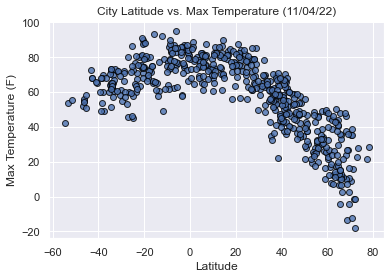

In [17]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], 
            city_data_df["Max Temp"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# Save the figure
plt.savefig("Latitude vs Temperature (F).png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

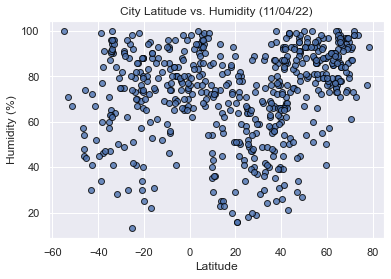

In [18]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], 
            city_data_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# Save the figure
plt.savefig("Latitude vs Humidity (%).png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

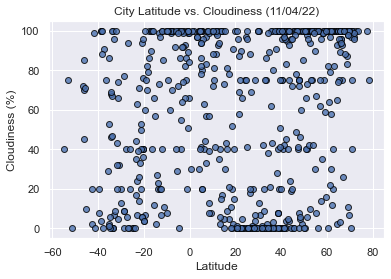

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], 
            city_data_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# Save the figure
plt.savefig("Latitude vs Cloudiness (%).png")

# Show plot
plt.show()



#### Latitude vs. Wind Speed Plot

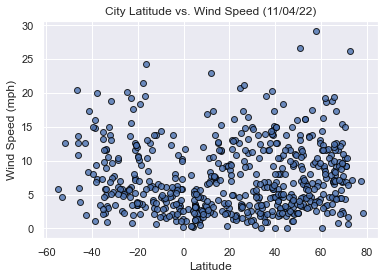

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], 
            city_data_df["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()


# Save the figure
plt.savefig("Latitude vs Wind Speed (MPH).png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [39]:
# Define a function to create Linear Regression plots
# Linear regression on Northern Hemisphere
def scatter_linreg(x_axis, y_axis, x_axis_label, y_axis_label, date, hemisphere):
    (slope, intercept, rval, pval, stderr) = linregress(x_axis, y_axis)
    print(f'The r-value is {round(rval, 2)}')
    show_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
    y_linreg = (slope * x_axis) + intercept
    plt.title(f'{x_axis_label} v {y_axis_label} on {date} in the {hemisphere} hemisphere')
    plt.xlabel(f'{x_axis_label}')
    plt.ylabel(f'{y_axis_label}')
    plt.grid()
    plt.scatter(x_axis, y_axis)
    plt.plot(x_axis, y_linreg, color='limegreen')
    annotate_x = x_axis.median()
    annotate_y = (y_axis.min()) + 10
    plt.annotate(show_eq, (annotate_x, annotate_y), color='red')
   
    

In [40]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] > 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,pacific grove,36.6177,-121.9166,55.08,84,0,8.99,US,1667353922
5,hamilton,39.1834,-84.5333,58.01,90,0,3.44,US,1667353490
6,paamiut,61.9940,-49.6678,27.27,61,0,6.13,GL,1667354066
8,severo-kurilsk,50.6789,156.1250,40.64,62,100,7.72,RU,1667353657
14,georgetown,5.4112,100.3354,82.33,82,20,5.01,MY,1667353665


In [41]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mildura,-34.2000,142.1500,59.07,57,79,19.17,AU,1667354064
2,bredasdorp,-34.5322,20.0403,60.85,88,95,15.28,ZA,1667353634
3,tiarei,-17.5333,-149.3333,73.42,91,100,21.72,PF,1667353631
4,hobart,-42.8794,147.3294,52.27,58,75,12.66,AU,1667353627
7,airai,-8.9266,125.4092,75.25,63,96,1.19,TL,1667353659


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.87


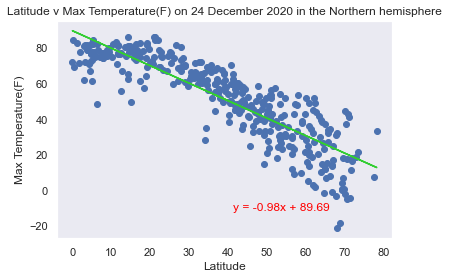

In [42]:
scatter_linreg(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Latitude', 'Max Temperature(F)', '24 December 2020', 'Northern')
plt.savefig("Latitude vs Max Temperature North(F).png")

The r-value is 0.65


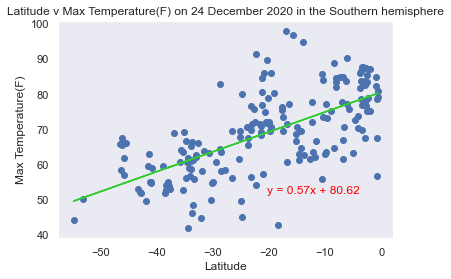

In [43]:
# Linear regression on Southern Hemisphere
scatter_linreg(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Max Temperature(F)', '24 December 2020', 'Southern')
plt.savefig("Latitude vs Max Temperature(F) South.png")

**Discussion about the linear relationship:** The linear regression between Maximum temperature and latitude for Southern and Northern Hemisphere cities showed that there is a strong negative and strong positive correlation between Maximum temperature and latitude. This means when we go farther away to the north from the equator(latitude 0) the maximum Temperature (F) will decrease in Northern cities and increase in Southern cities. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.17


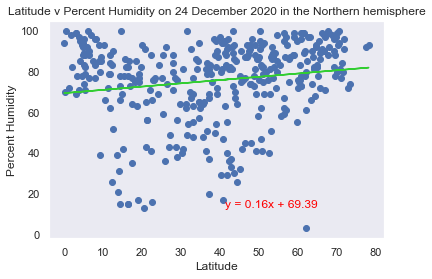

In [44]:
# Northern Hemisphere
scatter_linreg(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Percent Humidity', '24 December 2020', 'Northern')
plt.savefig("Latitude vs Percent Humidity North.png")

The r-value is 0.4


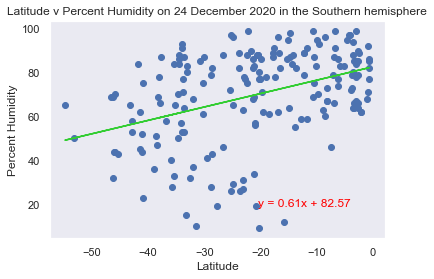

In [46]:
# Southern Hemisphere
scatter_linreg(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Percent Humidity', '24 December 2020', 'Southern')
plt.savefig("Latitude vs Percent Humidity South.png")


**Discussion about the linear relationship:** The linear regression model between Percent Humidity and Latitude for Southern and Northern Hemisphere cities showed that there is a very weak, positive correlation between Humidity (%) and Latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.15


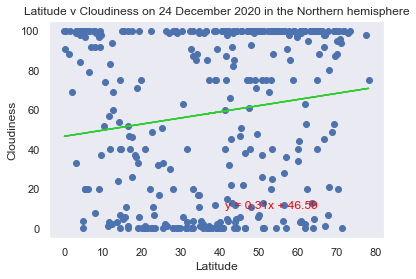

In [48]:
# Northern Hemisphere
scatter_linreg(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness', '24 December 2020', 'Northern')
plt.savefig("Latitude vs Cloudiness North.png")

The r-value is 0.38


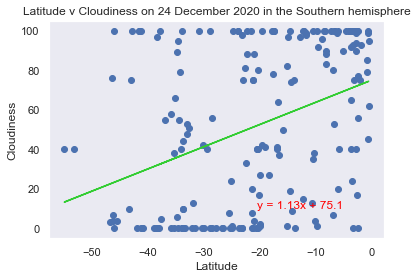

In [49]:
# Southern Hemisphere
scatter_linreg(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness', '24 December 2020', 'Southern')
plt.savefig("Latitude vs Cloudiness South.png")

**Discussion about the linear relationship:** The linear regression between Cloudiness (%) and Latitude for Northern and Southern Hemisphere cities showed that there is a very weak correlation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.29


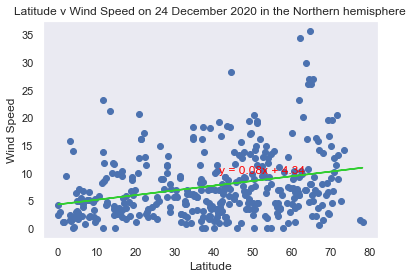

In [50]:
# Northern Hemisphere
scatter_linreg(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed', '24 December 2020', 'Northern')
plt.savefig("Latitude vs Wind Speed North.png")

The r-value is -0.32


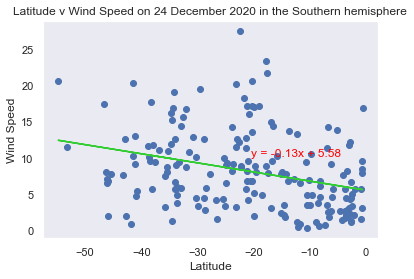

In [51]:
# Southern Hemisphere
scatter_linreg(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed', '24 December 2020', 'Southern')
plt.savefig("Latitude vs Wind Speed South.png")

**Discussion about the linear relationship:** The linear regression model between Wind Speed (mph), and latitude for Southern and Northern Hemisphere cities showed that there is a very weak correlation.